# Motivation

In the previous studies we may have encountered the concept of optimum search, which uses techniques suitable for locating optima pretty independently of the properties of the problem space. None of the methods discussed in the general descriptions of optimum search rely too heavily on numeric properties of the solution space itself, thus are quite general in nature.

None the less, we can argue, that if we do have some information regarding the properties of the problem space, we can use this to make our search for optima more efficient!

## Example: Where to climb?

Starting from the general situation of "hillclimbing", one of the weak spots for our approach is, that we are forced to try out neighboring solutions at random, that is, we have __no information about the "goodness" of neighbors__. The question is, at least in some problems, where certain numerical properties hold, can we maybe estimate - even when just locally - __in which direction we should take a step to decrease the error?__

Turns out: we can do exactly that, if we can use eg. __gradient based methods__.

# Gradient Descent

## Preliminaries

In general hillclimbing like scenarios we do not really have too many requirements towards how the solution can be understood. For gradient based methods, though, we have to adapt a very specific setup, namely that of __function minimization__. 

One of the most notable consequences of this is, that we will concern ourselves with __continuous spaces__, that is, we will assume, that the underlying solution we are looking for is __scalar in nature__, so as a continuous, arbitrarily fine grained step can be taken during optimization, as well as the solution itself can potentially have arbitrary numeric floating point precision (under constraints of our broader hardware and software environment).

We step away from __discrete or "combinatorial" optimization__, and enter __"continuous" optimization__. (In frames of this course we won't touch upon the third big field, "stochastic" optimization, where the solution itself has elements of randomness.)

<a href="http://drive.google.com/uc?export=view&id=19rTUagM5VsxO6BbkFQcb0cayYLIJPvwy"><img src="https://drive.google.com/uc?export=view&id=1nw1e1KctcqmbanAjsMSU7XaR_-Ng4eGp" width=45%></a>

This necessarily leads us to a kind of relaxation of the notion of "state" and "neighbors", which we no longer consider to be "atomic", but much more as __current scalar parameters__ of some kind.

"Parameters of what?" - One could ask, and rightfully so! In continuous optimization, it is dominantly assumed, that the solution of a problem has some kind of __"functional form"__, that is, it presents itself as a kind of function. In the above visual illustration, the continuous function was:

$\sqrt{2x}+1$

If we are searching for the solution, we can consider this to be written in the form of:

$\sqrt{w_1x}+w_2$

Where $w_1$ and $w_2$ are the unknown __scalar parameters__ we were searching for by successively modifying the $w$ parameters:

<a href="http://drive.google.com/uc?export=view&id=1ijaOwUgz4__luJSVNUP_Ku95tnYaY18H"><img src="https://drive.google.com/uc?export=view&id=12bd4k0pvWR_UurxkEbTM2zUylMIbml-C" width="45%"></a>


The big advantage of functional fitting is, that it allows naturally for __extrapolation__:

<a href="https://miro.medium.com/max/2160/1*aDllR5gUk-G4-Mjb4cbYPA.gif"><img src="https://drive.google.com/uc?export=view&id=1dP1z9rXiqzS_ycZAEBUMaF70FkbKF-cQ" width=45%></a>

Also observe, that this extrapolation behavior (hopefully, not in this case) can be problematic, because of __bad generalization__. Preventing such behavior is extensively discussed under the umbrella of ["overfitting"](https://en.wikipedia.org/wiki/Overfitting) in the statistics and machine learning literature, and is out of scope for the current course.

Depending on the assumed functional form we optimize, we can talk about "linear", "quadratic", or just simply "non-linear" optimization. Though these represent radically different problems, none the less, gradient descent is applicable on all of them.

## Why not solve analytically?


It is important to dwell on this assumption for a bit longer: It is the most typical case, as we have seen in this last animation above, that we only have a set of observations (the points above), and __we assume the functional form of the solution, for which we would like to estimate optimal parameters__, we "fit the curve", so to say, so we are looking for the __optimum of some error__ / difference function __with respect to the data__ at hand and __the assumed functional form__, and it's __parameters__.

We can thus state, that we would like to find a parameter set that given the functional form we assume, produces the best local approximation to the observed datapoints. 

In the most "lucky" case, we had the right "hypothesis", so we assumed the functional form that is the description of the underlying process generating the data, thus when we will get to the optimal approximation, we describe the phenomena completely well, and thus we can rely on this in the future.

So if we ourselves assume the functional form for fitting, why don't we use such functions, that have analytical solutions, and forego the whole search for optima altogether? Well, mainly because in real life situations, the data rarely comes from some very well behaved functions, and since future predictive value is our prime concern, __we have to assume complex functions__, thus, we don't have the luxury of closed form solutions. In fact, it is worth mentioning, that fifth or higher order equation systems do not typically have any closed form solution at all...

<a href="http://drive.google.com/uc?export=view&id=16AwVtO0epr7UN6tjWgvDBIkrVjglsdVo"><img src="https://drive.google.com/uc?export=view&id=1MHT0RGIk0h1SG5ams71fs3B8yM_QSxPI" width=45%></a>

But it is also worth mentioning, that even in case of very complicated functional forms, __taking derivatives locally, with respect to certain points is often feasible__, so the work with derivatives (called in case of multiple variables __gradient vector__) is a very useful tool, that we can build upon! 

## Visual example of the usage of gradients

Let us suppose, we continue using the function above:

$f(x) = x^{5}+3.5x^{4}-2.5x^{3}-12.5x^{2}+1.5x+9$

We decide, to do investigate the gangent line / derivative in the starting point $x=0.15$.

Let us investigate visually, what this would mean!
Please bear in mind, that tangent line calculation is __only for illustration__, it is not part of the GD procedure!

### 1. getting the slope

First derivative of it:
$f'(x)=5x^{4}+14x^{3}-7.5x^{2}-25x+1.5$

Calculating the derivative's value for $x=0.15$:

$5×0.15^4+14×0.15^3−7.5×0.15^2−25×0.15+1.5 = −2.36896875$

### 2. position of touching coordinates

So we got the slope for the tangent line. Let us calculate it's touching position's coordinates!

We know, that the two functions share a point at $x=0.15$, and we also know, that $f(0.15) = 8.937160313$, so we have a coordinate pair.

### 3. calculating tangent function

With the slope and the coordinates of the touching point, we can use the [point-slope formula](https://gato-docs.its.txstate.edu/slac/Subject/Math/Calculus/Findting-the-Equation-of-a-Tangent-Line/Finding) for calculating the tangent line's "slope-intercept" ("usual") formula.

- "The slope-intercept formula for a line is $y = mx + b$, where $m$ is the slope of the line and $b$ is the $y$-intercept.
- The point-slope formula for a line is $y - y_1 = m (x - x_1)$. This formula uses a point on the line, denoted by $(x_1, y_1)$, and the slope of the line, denoted by $m$, to calculate the slope-intercept formula for the line."

$y - y_1 = m (x - x_1)$

$y - 8.937160313 = −2.36896875(x-0.15)$

$y = −2.36896875(x-0.15) + 8.937160313$

### 4. visualization

<a href="http://drive.google.com/uc?export=view&id=1RqIErGPzNOgGE2JifE1qPkrGybjqRFJ2"><img src="https://drive.google.com/uc?export=view&id=1SJBsAlYfAmrojaukirkB8jl3Y6zegl2c" width=45%></a>

From the above image, we can see, that if we "follow along" the gradient, that is, __the slope of the tangent line__ at the current position (which was $x=0.15$ in our case), and we __take a step in the direction of the NEGATED gradient__ ($-1*-2.36896875$), __we will step in the direction of a local minimum.__

<a href="http://drive.google.com/uc?export=view&id=1ENd1cJjsTU-8blKL-194qJbMtADi8jnK"><img src="https://drive.google.com/uc?export=view&id=18v04-zSnYmeu8HakN5mzPZrirRbtRRCh" width=44%></a>

Please observe, though, that the __direction__ of the step ("increase $x$") might be right, but if we would take the step literally, that is, we would make $x = 0.15 + 2.36896875$, we would take a too big of a __magnitude__ of step, that would lead us to a value, that is not even visible on this chart!

Conceptually, with the __first derivative__, we created a __local, linear approximation__ of the function, that is only valid in a small $\epsilon$ region, but starts to __deteriorate quickly__, thus the setting of appropriate __step size__ is a crucial question in GD. (For many methods trying to mitigate these problems in case of really complex problem surfaces, see separate notebook on GD variants.)  

For a more robust approximation one can make use of the second derivatives (in fact, any [Taylor polynomial](https://en.wikipedia.org/wiki/Taylor_series)), which make our approximation better for a larger region.

For a short intuition, see:

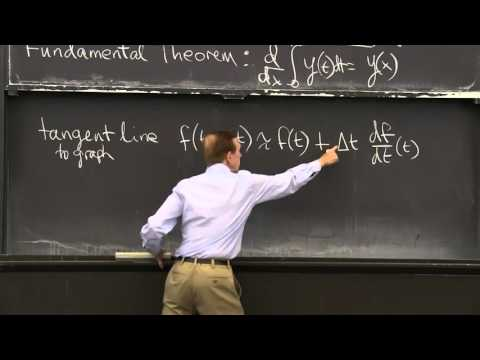

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('f0BxAtprWts', start=496)

We will get back to the topic of second derivatives, and with them, second order methods in a later part of the lecture. 

### Extension to multiple dimensions

Though up until now, we restricted our discussion to functions with on independent, and one dependent variable, but we have to realize, that nothing prevents us from calculating derivatives (in this case, really, properly called gradients) in a more complex functional plane.

For example, if we take two independent, and one dependent variable, the __tangent becomes a plane__, and the __gradient a vector__ with components for the two independent variables, instead of only one scalar, as before. 

<a href="https://i.stack.imgur.com/nntba.png"><img src="https://drive.google.com/uc?export=view&id=1ed9SJMZuJrPf1pxLQ6n9lxYuTkZWqzz-" width=45%></a>

<a href="https://i.stack.imgur.com/OI6Gy.gif"><img src="https://drive.google.com/uc?export=view&id=1FgSbb7IY_54ew6YmWKd4ewXDKm-inM20" width=45%></a>

<a href="http://drive.google.com/uc?export=view&id=1tItTVqiI-p0PDYDLFZszKwnUOOxq6_Ba"><img src="https://drive.google.com/uc?export=view&id=1paVigRCEZL2LlgLKUWXdyl2yKC9MGTEz" width=45%></a>

__The same procedure can be applied in arbitrary many dimensions.__



## The Gradient Descent method

The above discussion means in practice, that:

in a problemspace with however many parameters, __the gradient vector gives an update direction for every parameter at once towards a nearby minima__ based on a linear approximation.

So the main method is as follows:
- Start from randomly initialized parameters
- Take the derivative of the function to be optimized with respect to the current parameters, this gives the gradient vector
- Take a step (modify the parameters) with $-1*\lambda*gradients$ (Where $\lambda$ is a "learning rate", ensuring that we do not take a step too far away from the currrent point, where the approximation is miserable. It is usually in the order of magnitude of eg. $0.001$ or so.)
- Repeat, until gradient is "zero"

<a href="http://hduongtrong.github.io/assets/gradient_descent/gradient_descent.gif"><img src="https://drive.google.com/uc?export=view&id=1A1Qa3dwJoItJ2TY5ZjlddRpDUKH204e4" width=45%></a>


## Properties and limitations

### Speed

Why did we put double quote marks around "zero" above, or, to phrase it differently: do we see any problems with convergence in case of this last animation above?

The main observation here is, that as we move closer and closer to the minima, the magnitude of gradients gets successively smaller and smaller. This is somewhat beneficial for preventing the "overstepping" of the minima, but makes convergence exactly zero extremely painful, so in practice, some __$\epsilon$ tolerance is used as stopping criteria__ instead of zero. 

None the less, one can see, that there is drastic slowdown visible in convergence behavior, in fact, one can show, that __majority of the time the algorithm spent on realizing diminishing returns__. This makes "stopping" a problematic endeavor, and many times results in either excessive amounts of computation or suboptimal results.

The motivation for applying "higher order" methods, relying on the already mentioned second derivatives comes exactly from this effect, but leads to it's own problems (computational intractability or diverging behavior in case of "far from minima" starting points). In practice, when one is lucky (rarely) one can and should start with gradient descent, and after some steps switch over to high order methods.

### Local minima

The other, major problem with GD - as one might have already guessed - is, that it relies strictly on local information. The first derivative tells us about inflection points, the sceond derivative could inform us about local curvature, but none of these tells us about global optima - unless one can solve for the second derivative analytically.

<a href="https://lucidar.me/en/neural-networks/files/gradient-local-minima.png"><img src="https://drive.google.com/uc?export=view&id=1KCLRDkclC2yG8emAyby76aMGX4PstbIF" width=35%></a>

Also worth mentioning, that the gradient can be zero in case of a more "frustrating" topology, namely in "saddle points", where one parameter has a local minimum, and another(s) a maximum. Please remember, that the first derivative can not distinguish minima from maxima, so the gradient will be zero. (Or converging towards it painfully slowly, for that matter...)

<a href="https://upload.wikimedia.org/wikipedia/commons/thumb/1/1e/Saddle_point.svg/1200px-Saddle_point.svg.png"><img src="https://drive.google.com/uc?export=view&id=1yFNLgvWeR3e4T6vWwR6j4tBlF1SE3T35" width="45%"></a>

So in practice, convergence will only happen towards the closest local minima, where the procedure gets "stuck". For some approach to mitigating this effect, see our separate notebook on GD variants.


Bearing all these limitations in mind, none the less, gradient descent is still the "workhorse" of function optimization.

A good alternative presentation of the whole topic of Gradient Descent can be found [here](https://www2.seas.gwu.edu/~simhaweb/contalg/modules/module10/module10.html). TODO maybe talk about bracket search above??